# Projeto 1 - Análise exploratória de dados
                                                    Caio Horschutz Fauza
                                                    2° C - Engenharia 


# Informações sobre o projeto:
Indíces escolhidos: IDH, inflação (anual %) e suprimento de comida (kgcal/pessoa & dia)
    
    
Pergunta: Qual a relação da taxa anual de inflação na alimentação diária da população, refletindo consequentemente, no IDH? 

Objetivos secundários: 
* Análise de possível eficiência de políticas públicas voltadas ao aumento do IDH de acordo com análise exploratória de dados
* Verificação de correlação dos dados
 
Ano escolhido inicialmente para análise: 2007

Banco de dados: https://www.gapminder.org/data/

# Introdução
O Índice de desenvolvimento humano é uma ferramenta muito utilizada em pesquisas e análises da sociedade em escala global. Uma série de fatores podem afetar positivamente ou negativamente o IDH de um país. Este projeto visa analisar a relação de 2 índices independentes com o IDH, cumprindo os objetivos declarados nas informações fornecidas previamente.

# Coleta e desenvolvimento dos dados
* Limpeza da base para melhor análise
* Separação e disposição dos dados de maneira organizada

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


idh = pd.read_excel("Indicator_HDI.xlsx")
food = pd.read_excel("indicator food_consumption.xlsx")
inf = pd.read_excel("Inflation.xlsx")


idh2007 = idh.loc[:, ["HDI", 2007]]
food2007 = food.loc[:,["Food", 2007]]
inf2007 = inf.loc[:, ["Inflation, GDP deflator (annual %)", 2007]]


idh_i = idh2007.set_index("HDI")
food_i = food2007.set_index("Food")
inf_i = inf2007.set_index("Inflation, GDP deflator (annual %)")

joined = idh_i.join(inf_i, how="inner", lsuffix="_IDH", rsuffix="_Inflação")
dados = joined.join(food_i, how ="inner")

dados.rename(columns={2007 : "2007_Comida"}, inplace = True)
dados.head(25)



,2007_IDH,2007_Inflação,2007_Comida
Abkhazia,NaN,NaN,NaN
Afghanistan,0.363,13.208274,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN
Albania,0.729,2.024081,2879.57
Algeria,0.680,7.331055,3153.38
American Samoa,NaN,NaN,NaN
Andorra,NaN,3.870000,NaN
Angola,0.471,12.616432,1973.29
Anguilla,NaN,NaN,NaN
Antigua and Barbuda,NaN,23.258314,2368.50


Após o procedimento acima, foram analisados os índices separadamente para melhor visualização dos dados.

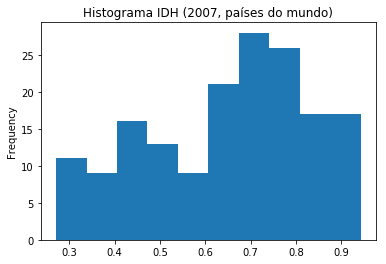

In [3]:
dados["2007_IDH"].plot.hist(title = "Histograma IDH (2007, países do mundo)")


O histograma acima (IDH - 2007) apresenta assimetria e os índices de maiores frequências se localizam entre 0.7 e 0.8.

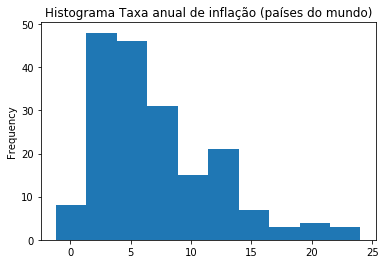

In [4]:
dados["2007_Inflação"].plot.hist(title="Histograma Taxa anual de inflação (países do mundo)")

O histograma acima (Inflação - 2007) apresenta assimetria e os índices de maiores frequências se localizam entre 0 e 7 aproximadamente.

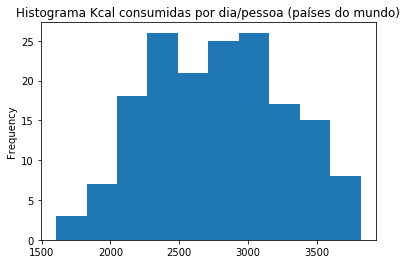

In [5]:
dados["2007_Comida"].plot.hist(title = "Histograma Kcal consumidas por dia/pessoa (países do mundo)")

O histograma acima apresenta pouca simetria e os índices de maiores frequências se localizam no intervalo de 2300 e 3100 aproximadamente.

O próximo passo realizado foi:

* Criação de função para linha de tendência e para os gráficos de dispersão 
* Plotagem de gráficos de dispersão entre os dados separados no dataframe
* Execução de tabela de correlação entre os dados

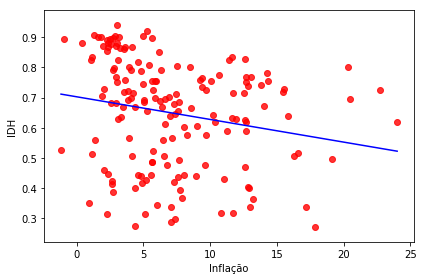

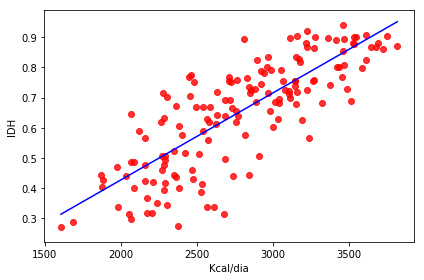

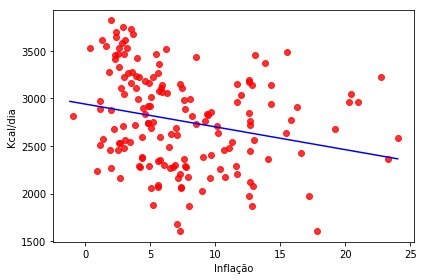

,2007_IDH,2007_Inflação,2007_Comida
2007_IDH,1.000000,-0.214771,0.803180
2007_Inflação,-0.214771,1.000000,-0.230099
2007_Comida,0.803180,-0.230099,1.000000


In [6]:
def reta(x, y, titulox, tituloy):
    a = y.cov(x)/x.var()
    b = y.mean() - a*x.mean()    
    plt.scatter(x, y, c= "red", alpha=0.8)
    plt.plot((x.min(), x.max()), (a*x.min()+b, a*x.max()+b), color='blue')
    plt.xlabel(titulox)
    plt.ylabel(tituloy)
    plt.tight_layout()
    plt.show()
    

reta(dados["2007_Inflação"], dados["2007_IDH"], "Inflação", "IDH")
reta(dados["2007_Comida"], dados["2007_IDH"], "Kcal/dia", "IDH")
reta(dados["2007_Inflação"], dados["2007_Comida"], "Inflação", "Kcal/dia")
dados.corr()

# Conclusão Primária

Após serem relacionados os 3 índices (IDH, Inflação e Kcal/pessoa/dia) as seguintes conclusões para o ano de 2007 foram obtidas:
* IDH e inflação não possuem correlação relevante (0.2)
* IDH e quantidade média de Kcal ingeridas diariamente pela população possuem alta correlação (0.80)

Tais afirmações podem ser observadas no gráfico e na tabela de correlação abaixo:

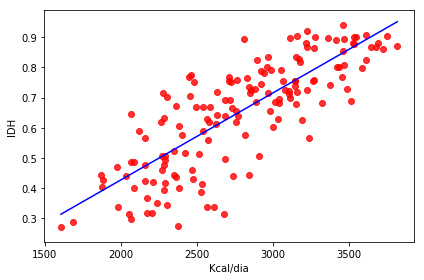

,2007_IDH,2007_Inflação,2007_Comida
2007_IDH,1.000000,-0.214771,0.803180
2007_Inflação,-0.214771,1.000000,-0.230099
2007_Comida,0.803180,-0.230099,1.000000


In [7]:
reta(dados["2007_Comida"], dados["2007_IDH"], "Kcal/dia", "IDH")
dados.corr()

Tais informações permitem nos dizer que, de acordo com os dados, investir os recursos do governo no combate a inflação pode não influenciar no Índice de Desenvolvimento Humano. Políticas públicas voltadas a melhoria na alimentação e suprimento de energia alimentar diária necessária (em conjunto com outros fatores, como por exemplo os reflexos do índice na saúde) podem ser mais efetivas na elevação do IDH.

Ao se relacionar quantidade média de ingestão de Kcal por dia pela população e inflação, o índice de correlação foi de 0.23, o que não nos permite relacionar as duas informações e avaliar os impactos de uma sobre a outra de maneira clara, ou seja, a inflação não está relacionada com a ingestão diária de Kcal e consequemente com o IDH (pergunta principal do projeto de análise), porém, a ingestão de Kcal está relacionada ao IDH (países com IDH alto possuem maior média de Kcal diárias)



# Ampliação de análise

Para apresentar uma conclusão mais clara e temporal, realizou-se a ampliação do dataframe nos índices IDH e Kcal por dia/pessoa para conter também os anos 2005, 2006 e 2000. Os dados de inflação para esses anos não foram explorados, devido a falta de evidências concretas de correlação com o IDH por meio da primeira análise.

In [8]:
idh2006 = idh.loc[:, ["HDI", 2006]]
idh2005 = idh.loc[:, ["HDI", 2005]]
idh2000 = idh.loc[:, ["HDI", 2000]]

food2006 = food.loc[:, ["Food", 2006]]
food2005 = food.loc[:,["Food", 2005]]
food2000 = food.loc[:,["Food", 2000]]

idh_i6 = idh2006.set_index("HDI")
food_i6 = food2006.set_index("Food")
idh_i5 = idh2005.set_index("HDI")
food_i5 = food2005.set_index("Food")
idh_i0 = idh2000.set_index("HDI")
food_i0 = food2000.set_index("Food")

a1 = idh_i.join(idh_i6, how="inner", lsuffix="_IDH", rsuffix="_IDH")
b1 =a1.join(idh_i5, how ="inner")
b2 = b1.join(idh_i0, how = "inner")
b2.rename(columns={2007 : "2007_IDH", 2006 : "2006_IDH", 2005: "2005_IDH", 2000: "2000_IDH"}, inplace = True)
b3 = b2.join(food_i, how = 'inner')
b4 = b3.join(food_i6, how = "inner")
b5 = b4.join(food_i5, how = "inner")
dadosampliados = b5.join(food_i0, how = "inner")
dadosampliados.rename(columns={2007 : "2007_Kcal", 2006: "2006_Kcal", 2005: "2005_Kcal", 2000: "2000_Kcal"}, inplace = True)
dadosampliados.head()



,2007_IDH,2006_IDH,2005_IDH,2000_IDH,2007_Kcal,2006_Kcal,2005_Kcal,2000_Kcal
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,0.363,0.354,0.340,0.230,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,0.729,0.724,0.721,0.691,2879.57,2914.95,2917.08,2832.07
Algeria,0.680,0.673,0.667,0.624,3153.38,3101.20,3059.24,2928.84


Com os dados organizados, realizou-se um boxplot com os múltiplos anos para os índices:


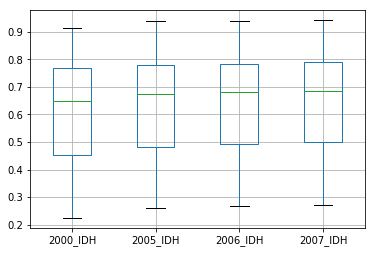

In [9]:
dadosampliados.loc[:,["2000_IDH", "2005_IDH", "2006_IDH", "2007_IDH"]].boxplot()


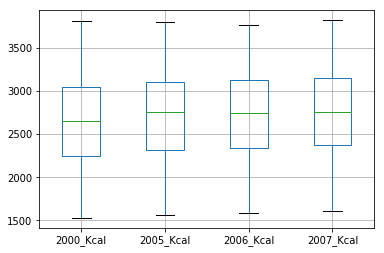

In [10]:
dadosampliados.loc[:,["2000_Kcal", "2005_Kcal", "2006_Kcal", "2007_Kcal"]].boxplot()

De acordo com os boxplots realizados, é possível notar que as mudanças nas medianas e nos interquartis não foram tão significativas com o passar dos anos.

Para visualizar ainda mais tal afirmação, graficos de dispersão foram realizados para todos os anos selecionados:

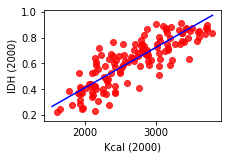

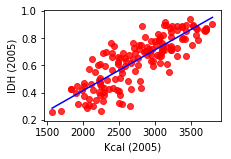

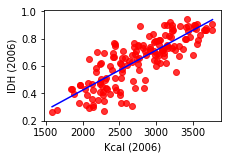

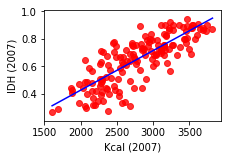

In [23]:
listakcal = ["2000_Kcal", "2005_Kcal", "2006_Kcal", "2007_Kcal"]
listaidh = ["2000_IDH", "2005_IDH", "2006_IDH", "2007_IDH"]
plt.subplot(221)
reta(dadosampliados["2000_Kcal"], dadosampliados["2000_IDH"], "Kcal (2000)", "IDH (2000)")
plt.subplot(222)
reta(dadosampliados["2005_Kcal"], dadosampliados["2005_IDH"], "Kcal (2005)", "IDH (2005)")
plt.subplot(223)
reta(dadosampliados["2006_Kcal"], dadosampliados["2006_IDH"], "Kcal (2006)", "IDH (2006)")
plt.subplot(224)
reta(dadosampliados["2007_Kcal"], dadosampliados["2007_IDH"], "Kcal (2007)", "IDH (2007)")    

Para finalizar, os índices de correlação foram comparados:

In [24]:
dadosampliados.loc[:,["2000_Kcal", "2000_IDH"]].corr()

,2000_Kcal,2000_IDH
2000_Kcal,1.000000,0.838374
2000_IDH,0.838374,1.000000


In [25]:
dadosampliados.loc[:,["2005_Kcal", "2005_IDH"]].corr()

,2005_Kcal,2005_IDH
2005_Kcal,1.000000,0.825026
2005_IDH,0.825026,1.000000


In [26]:
dadosampliados.loc[:,["2006_Kcal", "2006_IDH"]].corr()

,2006_Kcal,2006_IDH
2006_Kcal,1.000000,0.807091
2006_IDH,0.807091,1.000000


In [27]:
dadosampliados.loc[:,["2007_Kcal", "2007_IDH"]].corr()

,2007_Kcal,2007_IDH
2007_Kcal,1.00000,0.80318
2007_IDH,0.80318,1.00000


# Conclusão secundária
De acordo com a análise realizada acima, é possível notar que a conclusão obtida inicialmente também é válida para outros anos, tornando-se então mais geral, uma vez que a correlação com o passar dos anos não foi afetada significativamente, continuando na mesma casa decimal (0.8).

Partindo para um princípio mais biológico, a necessidade diária de Kcal para uma mulher adulta é aproximadamente 2000 kcal/dia e a do homem aproximadamente 2500 (https://www.cnpp.usda.gov/sites/default/files/usda_food_patterns/EstimatedCalorieNeedsPerDayTable.pdf), ou seja, nos países de IDH alto, a população possui maior poder aquisitivo, podendo portanto, investir mais em alimentação de qualidade e suplementação nutricional, o que pode explicar as conclusões obtidas com a análise exploratória em questão.

Por fim, foi feita a transferência do dataframe para um arquivo de extensão .csv:

In [67]:
dadosampliados.to_csv("dados.csv")